<a href="https://colab.research.google.com/github/rubygitflow/Transformers/blob/master/University_of_Artificial_Intelligence_NLP_HomeWork_9_Lite_Transformers_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP.Lesson 9.Transformers. En-Ru translator

# Checking the GPU

In [4]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import os
import psutil
import humanize
import GPUtil as GPU
GPUs = GPU.getGPUs()
if len(GPUs)>0:
  gpu = GPUs[0]
else:
  print('GPU turned off')
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM FREE: "+humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  if len(GPUs)>0:
    print("Gen RAM FREE: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
    print("GPU Model: " + gpu.name)

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=7216f3854cc336226b2c0f14999aac5435631cc14bba1da781a3d0b24d2e0375
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM FREE: 12.8 GB  | Proc size: 161.6 MB
Gen RAM FREE: 11441MB | Used: 0MB | Util   0% | Total 11441MB
GPU Model: Tesla K80


# Data loading

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def highlight_chars(txt):
  # select spetial  chars
  angle_brackets = ['<', '>']
  for elem in angle_brackets:
    txt = txt.replace(elem, ' '+elem+' ')

  # select digits
  txt = re.sub(r'\d\d\.\d\d\.\d{4}', r' <date> ', txt)  # "" 
  txt = re.sub(r'\d\d\.\d\d\.\d\d', r' <date> ', txt)   # "" 
  txt = re.sub(r'\d\d\/\d\d\/\d{4}', r' <date> ', txt)  # "" 
  txt = re.sub(r'\d\d\/\d\d\/\d\d', r' <date> ', txt)   # "" 
  txt = re.sub(r'\d\d:\d\d:\d\d', r' <time> ', txt)     # "" 
  txt = re.sub(r'\d\d-\d\d-\d\d', r' <time> ', txt)     # "" 
  txt = re.sub(r'\d\d—\d\d—\d\d', r' <time> ', txt)     # "" 
  txt = re.sub(r'\d\d–\d\d–\d\d', r' <time> ', txt)     # "" 
  txt = re.sub(r'\d\d:\d\d', r'<time>', txt)          # "" 

  txt = re.sub(r'\d+-\d+', r' <range> ', txt)         #  '4-5'
  txt = re.sub(r'\d+\/\d+', r' <real> ', txt)         # "8/8" 
  txt = re.sub(r'\d+,\d+', r' <real> ', txt)          # "8,8" 
  txt = re.sub(r'\d+\.\d+', r' <number> ', txt)       # "9.8" 
  # for \s-char exclude \t-char
  txt = re.sub(r'-\d+\. ', r' <number> . ', txt)     # "-1. "  
  txt = re.sub(r'–\d+\. ', r' <number> . ', txt)     # "–1. "  
  txt = re.sub(r'—\d+\. ', r' <number> . ', txt)     # "—1. "  
  txt = re.sub(r'\d+\.\n', r' <number> . ', txt)      # "7. "  
  txt = re.sub(r'-\d+\.\n', r' <number> . ', txt)     # "-1. "  
  txt = re.sub(r'–\d+\.\n', r' <number> . ', txt)     # "–1. "  
  txt = re.sub(r'—\d+\.\n', r' <number> . ', txt)     # "—1. "  
  txt = re.sub(r'\d+\.\n', r' <number> . ', txt)      # "7. "  

  txt = re.sub(r'\d+', r' <number> ', txt)      # "17"  

  # select any symbols (manually created list)
  char_list = ['-', '.', ',', '"', '$', '«', 'ø', '%', ')', '&', '−', '≤', '‘', '£', '?', '™', '‚', '(', '*', '№', '•', ';', '½', '’', '/', '+', '±', '>', '“', 'ş', '¦', '–', "'", '€', '#', '§', '”', '@', '‑', ':', '!', '»', '¼', '·', '°', '…', '=', '—']
  refreshed_char_list = [item for item in char_list if item not in angle_brackets]  # very important exclude spetial  chars from list !
  for elem in refreshed_char_list:
    txt = txt.replace(elem, ' '+elem+' ')
    
  return txt

In [8]:
with open('/content/drive/My Drive/Базы/NLP/English-Russian.1-1.txt', 'r') as f:
  text = f.read()
  text = text.replace('\ufeff', '')  
  text = text.replace('\uf043', ' ')  
  text = text.replace('\x9d', ' ')  
  text = text.replace('\uf029', ' ')  
  text = text.replace('\x81', ' ')  
  text = text.replace('\xad', ' ')  
  text = text.replace('\uf024', ' ')  
  text = text.replace('\x91', ' ')  
  text = text.replace('\uf042', ' ')  
  text = text.replace('\x8d', ' ')  
  text = text.replace('\x80', ' ')  
  text = text.replace('\uf0d4', ' ')  
  text = text.replace('\x90', ' ')  
  text = text.replace('\x8f', ' ')  
  text = text.replace('\uf0b7', ' ')  
  text = text.replace('�', ' ')  
  text = text.replace('', ' ')
  text = text.replace('\' \'', ' ')  
  text = text.replace('\' \'', ' ')  
  text = text.replace('& quot ;', ' ')  
  text = highlight_chars(text)

  text_of_chars = re.sub(r'[А-яA-z0-9\n\t<>]', ' ', text) 
  text_of_chars = ' '.join(text_of_chars.split())

In [9]:
text_of_lexemes = ' '.join(text.split(' '))

In [10]:
print(text_of_lexemes[:1000])

Musharraf  ’  s Last Act  ? 	Последний ход Мушаррафа  ? 
Desperate to hold onto power  ,  Pervez Musharraf has discarded Pakistan  ’  s constitutional framework and declared a state of emergency  . 	В отчаянном стремлении удержать власть  ,  Первез Мушарраф отверг конституционную систему Пакистана и объявил о введении чрезвычайного положения  . 
Artfully  ,  though shamelessly  ,  he has tried to sell this action as an effort to bring about stability and help fight the war on terror more effectively  . 	Искусно  ,  хотя и бессовестно  ,  он попытался оправдать данное действие стремлением установить стабильность и начать более эффективную борьбу с терроризмом  . 
Nothing could be further from the truth  . 	Это крайне далеко от действительности  . 
If Pakistan  ’  s history is any indicator  ,  his decision to impose martial law may prove to be the proverbial straw that breaks the camel  ’  s back  . 	Если судить по пакистанской истории  ,  его решение установить военное положение может 

In [11]:
dictionary = text_of_lexemes.split('\n')

In [13]:
dictionary.__len__()

85205

In [14]:
# Improved algorithmic cleaning of the dictionary from garbage
en = []
ru = [] 
min_len_limit = 5
max_len_limit = 21
# provide a protection from obvious garbage
for elem in dictionary:
  dic = elem.split('\t')
  eng = ' '.join(dic[0].split())
  rus = ' '.join(dic[1].split())
  # count of words
  len_en = len(eng.split())
  len_ru = len(rus.split()) 
  if len_en >= min_len_limit and len_ru >= min_len_limit and len_en < max_len_limit and len_ru < max_len_limit: # limit the length of sentences
    if len_en > len_ru // 2 and len_ru > len_en // 2: #  we consider only meaningful constructions
      if re.search(r'[A-z]+', eng) and re.search(r'[А-я]+', rus): #  we have a real translation
        en.append(eng)
        ru.append(rus)

In [15]:
len(en), len(ru)

(29206, 29206)

In [18]:
length_dictionary = len(en)

In [16]:
ru[:13], en[:13]

(['Это крайне далеко от действительности .',
  'В результате , Пакистан получил американскую финансовую помощь и оружие .',
  'Результаты данных операций против Талибана и Аль - Каеды оказались неоднозначными .',
  'Мушарраф не был готов отдать свою военную должность , но хотел быть ещё и гражданским лицом - президентом .',
  'Судебные разбирательства , длившиеся в течение последних нескольких недель , заставили Мушаррафа поволноваться .',
  'Решение судебного совета , состоящего из <number> членов , легко могло быть вынесено и не в его пользу .',
  'С тех пор начались аресты юристов , активистов по борьбе за права человека и политических лидеров .',
  'Данные действия вызвали широкое народное негодование .',
  'Вооружённые силы Пакистана ( являющиеся постоянной мишенью террористов - смертников ) деморализованы .',
  'Трудно себе представить их вместе с Мушаррафом , если разразится гражданский конфликт .',
  'Хассан Аббас – был сотрудником администраций как премьер - министра Беназир Б

In [ ]:
ru[:length_dictionary]

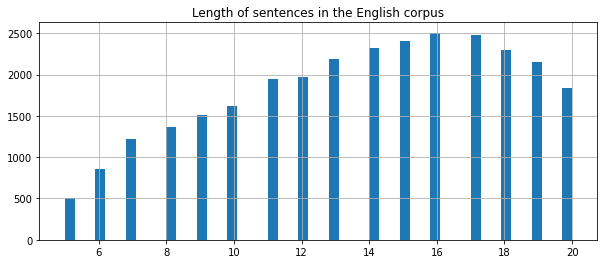

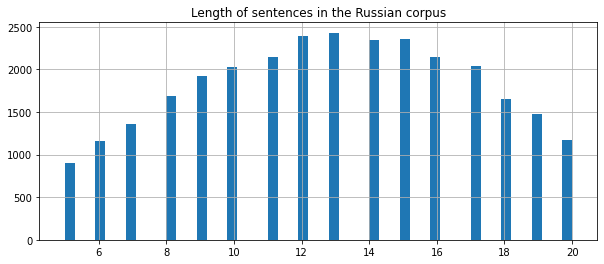

In [21]:
# Let's see which sentence length to choose
sizeEn = []
for i in en:
  sizeEn.append(len(i.split()))
plt.figure(figsize=(10,4))
plt.title('Length of sentences in the English corpus')
plt.hist(sizeEn, bins=50)
plt.grid(True)
plt.show()

sizeRu = []
for i in ru:
  sizeRu.append(len(i.split()))
plt.figure(figsize=(10,4))
plt.title('Length of sentences in the Russian corpus')
plt.hist(sizeRu, bins=50)
plt.grid(True)
plt.show()


In [22]:
min(sizeRu), max(sizeRu), len(sizeRu)

(5, 20, 29206)

In [23]:
min(sizeEn), max(sizeEn), len(sizeEn)

(5, 20, 29206)

# Creating a training datasets

In [24]:
import tensorflow as tf
import numpy as np
import unicodedata
import time
import datetime


In [25]:
# Сервисная функция Печати даты
def print_now():
  return datetime.datetime.today().strftime("%Y-%m-%d %H:%M:%S") # 2020-04-05 00:18:00

In [26]:
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def normalize_string(s):
    s = unicode_to_ascii(s)
    s = re.sub(r'([.,?!$%&£№;/<>ş€§@‑:°…=−–—\-\)\(])', r' \1', s)
    s = re.sub(r'[^a-zA-Zа-яА-Я.,?!$%&£№;/<>ş€§@‑:°…=−–—\-\)\(]+', r' ', s)
    s = ' '.join(s.split())
    return s

raw_data_en, raw_data_ru = en, ru
raw_data_en = [normalize_string(data) for data in raw_data_en]
raw_data_ru_in = ['<start> ' + normalize_string(data) for data in raw_data_ru]
raw_data_ru_out = [normalize_string(data) + ' <end>' for data in raw_data_ru]

In [27]:
en_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
en_tokenizer.fit_on_texts(raw_data_en)
data_en = en_tokenizer.texts_to_sequences(raw_data_en)
data_en = tf.keras.preprocessing.sequence.pad_sequences(data_en,
                                                        padding='post')

ru_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
ru_tokenizer.fit_on_texts(raw_data_ru_in)
ru_tokenizer.fit_on_texts(raw_data_ru_out)
data_ru_in = ru_tokenizer.texts_to_sequences(raw_data_ru_in)
data_ru_in = tf.keras.preprocessing.sequence.pad_sequences(data_ru_in,
                                                           padding='post')

data_ru_out = ru_tokenizer.texts_to_sequences(raw_data_ru_out)
data_ru_out = tf.keras.preprocessing.sequence.pad_sequences(data_ru_out,
                                                            padding='post')

In [28]:
data_en.shape, data_ru_in.shape, data_ru_out.shape

((29206, 24), (29206, 26), (29206, 26))

In [29]:
BATCH_SIZE = 80
dataset = tf.data.Dataset.from_tensor_slices(
    (data_en, data_ru_in, data_ru_out))
dataset = dataset.shuffle(20).batch(BATCH_SIZE)

In [30]:
def positional_embedding(pos, hidden_dim):
    PE = np.zeros((1, hidden_dim))
    for i in range(hidden_dim):
        if i % 2 == 0:
            PE[:, i] = np.sin(pos / 10000 ** (i / hidden_dim))
        else:
            PE[:, i] = np.cos(pos / 10000 ** ((i - 1) / hidden_dim))
    return PE

max_length = max(len(data_en[0]), len(data_ru_in[0]))
HIDDEN_DIM = 128

pes = []
for i in range(max_length):
    pes.append(positional_embedding(i, HIDDEN_DIM))

pes = np.concatenate(pes, axis=0)
pes = tf.constant(pes, dtype=tf.float32)

In [31]:
max_length

26

In [32]:
pes.numpy().shape

(26, 128)

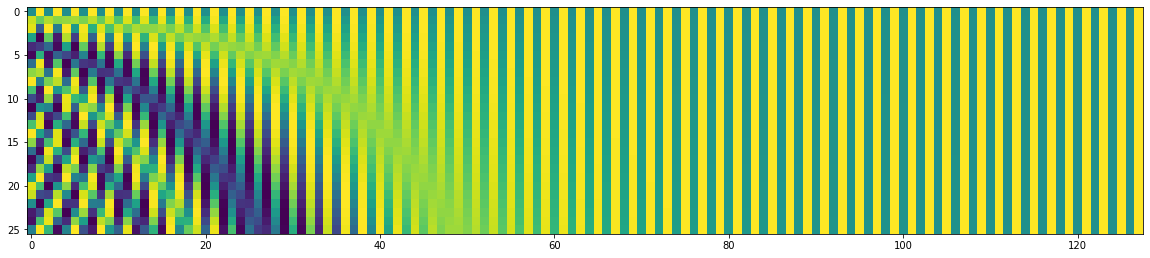

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(pes.numpy())

In [35]:
crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)
def loss_func(targets, logits):
    mask = tf.math.logical_not(tf.math.equal(targets, 0))
    mask = tf.cast(mask, dtype=tf.int64)
    loss = crossentropy(targets, logits, sample_weight=mask)

    return loss


optimizer = tf.keras.optimizers.Adam()

In [36]:
H = 2
NUM_LAYERS = 2

en_vocab_size = len(en_tokenizer.word_index) + 1
print('Input vocabulary size', en_vocab_size)

ru_vocab_size = len(ru_tokenizer.word_index) + 1
max_len_ru = data_ru_in.shape[1]
print('Target vocabulary size', ru_vocab_size)


Input vocabulary size 18803
Target vocabulary size 42775


# Modelling. An accelerated algorithm of a transformer (parallel cycles, the use of masking)

In [52]:
class MultiHeadAttention(tf.keras.Model):
    def __init__(self, hidden_dim, h):
        super(MultiHeadAttention, self).__init__()
        self.key_size = hidden_dim // h
        self.h = h
        self.wq = tf.keras.layers.Dense(hidden_dim) #замена [tf.keras.layers.Dense(key_size) for _ in range(h)]
        self.wk = tf.keras.layers.Dense(hidden_dim) #замена [tf.keras.layers.Dense(key_size) for _ in range(h)]
        self.wv = tf.keras.layers.Dense(hidden_dim) #замена [tf.keras.layers.Dense(value_size) for _ in range(h)]
        self.wo = tf.keras.layers.Dense(hidden_dim)
    
    def call(self, decoder_output, encoder_output, mask=None):
        
        
        query = self.wq(decoder_output)
        key = self.wk(encoder_output)
        value = self.wv(encoder_output)
        
        # Split for multihead attention
        batch_size = query.shape[0]
        query = tf.reshape(query, [batch_size, -1, self.h, self.key_size])
        query = tf.transpose(query, [0, 2, 1, 3])
        key = tf.reshape(key, [batch_size, -1, self.h, self.key_size])
        key = tf.transpose(key, [0, 2, 1, 3])
        value = tf.reshape(value, [batch_size, -1, self.h, self.key_size])
        value = tf.transpose(value, [0, 2, 1, 3])
        
        score = tf.matmul(query, key, transpose_b=True) / tf.math.sqrt(tf.dtypes.cast(self.key_size, dtype=tf.float32))
        
        if mask is not None:
            score *= mask
            score = tf.where(tf.equal(score, 0), tf.ones_like(score) * -1e9, score)
        
        a = tf.nn.softmax(score, axis=-1)
        context = tf.matmul(a, value)
        context = tf.transpose(context, [0, 2, 1, 3])
        context = tf.reshape(context, [batch_size, -1, self.key_size * self.h])
        
        heads = self.wo(context)
        return heads

In [53]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, hidden_dim, num_layers, h):
        super(Encoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.h = h
        self.embedding = tf.keras.layers.Embedding(vocab_size, hidden_dim)
        self.attention = [MultiHeadAttention(hidden_dim, h) for _ in range(num_layers)]

        self.attention_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]

        self.dense_1 = [tf.keras.layers.Dense(512, activation='relu') for _ in range(num_layers)]
        self.dense_2 = [tf.keras.layers.Dense(hidden_dim) for _ in range(num_layers)]
        self.ffn_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]

    def call(self, sequence, padding_mask=None):
        embed_out = self.embedding(sequence)
        embed_out += pes[:sequence.shape[1], :]
        
        sub_in = embed_out
        
        for i in range(self.num_layers):
            sub_out = self.attention[i](sub_in, sub_in, padding_mask)
            sub_out = sub_in + sub_out
            sub_out = self.attention_norm[i](sub_out)
            
            ffn_in = sub_out

            ffn_out = self.dense_2[i](self.dense_1[i](ffn_in))
            ffn_out = ffn_in + ffn_out
            ffn_out = self.ffn_norm[i](ffn_out)

            sub_in = ffn_out
            
        return ffn_out

In [54]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, hidden_dim, num_layers, h):
        super(Decoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.h = h
        self.embedding = tf.keras.layers.Embedding(vocab_size, hidden_dim)
        self.attention_bot = [MultiHeadAttention(hidden_dim, h) for _ in range(num_layers)]
        self.attention_bot_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]
        self.attention_mid = [MultiHeadAttention(hidden_dim, h) for _ in range(num_layers)]
        self.attention_mid_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]
        
        self.dense_1 = [tf.keras.layers.Dense(512, activation='relu') for _ in range(num_layers)]
        self.dense_2 = [tf.keras.layers.Dense(hidden_dim) for _ in range(num_layers)]
        self.ffn_norm = [tf.keras.layers.BatchNormalization() for _ in range(num_layers)]
        
        self.dense = tf.keras.layers.Dense(vocab_size)
        
    def call(self, sequence, encoder_output, padding_mask=None):
        # embeddings
        embed_out = self.embedding(sequence)
        embed_out += pes[:sequence.shape[1], :]
        
        bot_sub_in = embed_out
        
        for i in range(self.num_layers):
            # Bottom attention block
            seq_len = bot_sub_in.shape[1]
            look_left_only_mask = tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
            bot_sub_out = self.attention_bot[i](bot_sub_in, bot_sub_in, look_left_only_mask)
            bot_sub_out = bot_sub_in + bot_sub_out
            bot_sub_out = self.attention_bot_norm[i](bot_sub_out)
            
            # Upper attention block
            mid_sub_in = bot_sub_out

            mid_sub_out = self.attention_mid[i](mid_sub_in, encoder_output, padding_mask)
            mid_sub_out = mid_sub_out + mid_sub_in
            mid_sub_out = self.attention_mid_norm[i](mid_sub_out)

            # Dense layer
            ffn_in = mid_sub_out

            ffn_out = self.dense_2[i](self.dense_1[i](ffn_in))
            ffn_out = ffn_out + ffn_in
            ffn_out = self.ffn_norm[i](ffn_out)

            bot_sub_in = ffn_out
        
        logits = self.dense(ffn_out)
            
        return logits

In [55]:
@tf.function
def train_step(source_seq, target_seq_in, target_seq_out):
    with tf.GradientTape() as tape:
        padding_mask = 1 - tf.cast(tf.equal(source_seq, 0), dtype=tf.float32)
        padding_mask = tf.expand_dims(padding_mask, axis=1)
        padding_mask = tf.expand_dims(padding_mask, axis=1)
        encoder_output = encoder(source_seq, padding_mask)
        
        decoder_output = decoder(target_seq_in, encoder_output, padding_mask)

        loss = loss_func(target_seq_out, decoder_output)

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return loss

In [67]:
def predict(test_source_text=None):
    if test_source_text is None:
        test_source_text = raw_data_en[np.random.choice(len(raw_data_en))]
    print(test_source_text)
    test_source_seq = en_tokenizer.texts_to_sequences([test_source_text])
    print(test_source_seq)

    en_output = encoder(tf.constant(test_source_seq))

    de_input = tf.constant([[ru_tokenizer.word_index['<start>']]], dtype=tf.int64)

    out_words = []

    while True:
        de_output = decoder(de_input, en_output)
        new_word = tf.expand_dims(tf.argmax(de_output, -1)[:, -1], axis=1)
        out_words.append(ru_tokenizer.index_word[new_word.numpy()[0][0]])

        de_input = tf.concat((de_input, new_word), axis=-1)

        if out_words[-1] == '<end>' or len(out_words) >= 14:
            break

    print(' '.join(out_words[:-1]))

# Neural network training

In [57]:
local_path = '/content/drive/My Drive/tmp/'

encoder = Encoder(en_vocab_size, HIDDEN_DIM, NUM_LAYERS, H)
decoder = Decoder(ru_vocab_size, HIDDEN_DIM, NUM_LAYERS, H)

In [62]:
NUM_EPOCHS = 100

In [63]:
print('Старт обучения: {}'.format(print_now()))

start_time = time.time()
back_loss = 100.0
for e in range(NUM_EPOCHS):
    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in,
                          target_seq_out)

    print('Epoch {} ; {} ; Loss {:.4f}'.format(
          e + 1, print_now(), loss.numpy()))

    if (e + 1) % 5 == 0:
        end_time = time.time()
        print('Среднее время: {:.2f}s'.format((end_time - start_time) / (e + 1)))
        try:
            predict()
            predict()
            predict()
        except Exception as e:
            print(e)
            continue
    
    if back_loss > loss:
      back_loss = loss
      encoder.save_weights(local_path + 'transformer_encoder.h5')
      decoder.save_weights(local_path + 'transformer_decoder.h5')

print('Общее время: {:.2f}s'.format(time.time() - start_time))

Старт обучения: 2020-09-22 07:53:42
Epoch 1 ; 2020-09-22 07:54:41 ; Loss 3.7810
Epoch 2 ; 2020-09-22 07:55:40 ; Loss 2.9661
Epoch 3 ; 2020-09-22 07:56:40 ; Loss 1.7032
Epoch 4 ; 2020-09-22 07:57:41 ; Loss 1.4519
Epoch 5 ; 2020-09-22 07:58:41 ; Loss 1.3080
Среднее время: 59.90s
No limits were ever imposed on players movements , except by Communist countries .
[[43, 790, 64, 424, 1476, 24, 3102, 1436, 3, 2263, 29, 763, 49, 1]]
никакая практика , паразиты , как создало свои секреты на разработку развивающихся стран .
But increasing the number of immigrant workers will not necessarily raise fertility rates .
[[14, 1065, 2, 489, 4, 4776, 626, 25, 17, 1504, 1549, 2804, 250, 1]]
но ослабление работы паразиты не влияет на льготы , что не оправдала . <end>
There are times when being proven right brings no pleasure .
[[40, 13, 379, 86, 200, 2599, 150, 1796, 43, 4172, 1]]
в пожилом свете , как совершенных разумнои самоубииства . <end>
Epoch 6 ; 2020-09-22 07:59:44 ; Loss 1.5282
Epoch 7 ; 2020-09-

# Checking the Inference-model

## Translation from the latest neural network model

In [ ]:
# Load the best Inference-model
# for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
#     loss = train_step(source_seq, target_seq_in, target_seq_out)

# encoder.load_weights(local_path + 'transformer_encoder.h5')
# decoder.load_weights(local_path + 'transformer_decoder.h5')

In [64]:
test_sents = (
    'Can Terrorism Be Cured?',
    'The review promises to be nothing short of a watershed.',
    "America ’ s defense policy is at a crossroads.",
    'A remarkable incident has emboldened Chinese journalists.',
    "A New Dawn for Chinese Journalism?",
    "Define work roles and responsibilities clearly;",
    "But Armstrong ’ s legacy is about more than data.",
    "The timing of the 2001 rate decrease stunned the market.",
    "But their support of scientific research was limited to publication.",
    "But one should be clear about what one is forecasting.",
    "Indeed , the authorities ' response was not limited to monetary stimulus.",
    "The risks created by computer technology are real and frightening.",
    "Fears about computers eliminating jobs are , of course , not new.",
    "Information technology is growing at a faster pace than 5 %.",
    "The resulting changes will not all be welcome in economic terms.",
    "But some candidates will not be able to conclude negotiations this year.",
    "If we don ' t grasp the moment it will vanish.",
    "Room for manoeuvre in the enlargement negotiations is limited.",
    "The resulting trade and investment will make everyone better off.",
    "It is about lasting peace and shared prosperity.",
    "Trump: I’m so angry at Republicans.",
    'Realizing the fully automated additive manufacturing workshop of tomorrow.'
)
# The last two phrases are new to the neural network
# — Трамп: Я так зол на республиканцев.
# — Реализация полностью автоматизированного цеха аддитивного производства завтрашнего дня.

for test_sent in test_sents:
    test_sequence = normalize_string(test_sent)
    predict(test_sequence)


Can Terrorism Be Cured ?
[[42, 281, 16, 15508, 48]]
можно ли исцелить терроризм ? <end>
The review promises to be nothing short of a watershed .
[[2, 2129, 983, 5, 16, 285, 338, 4, 9, 4430, 1]]
выход этого доклада обещает стать надежда . <end>
America s defense policy is at a crossroads .
[[69, 11, 479, 92, 6, 32, 9, 6086, 1]]
оборонная политика америки находится на распутье . <end>
A remarkable incident has emboldened Chinese journalists .
[[9, 1550, 4078, 22, 8991, 357, 1339, 1]]
один знаменательныи случаи придал смелости китаиским журналистам . <end>
A New Dawn for Chinese Journalism ?
[[9, 53, 7199, 12, 357, 3557, 48]]
новыи рассвет китаискои основои журналистики ? <end>
Define work roles and responsibilities clearly ;
[[1807, 157, 3502, 8, 2493, 562, 124]]
четко определите рабочие роли и обязанности ; <end>
But Armstrong s legacy is about more than data .
[[14, 3153, 11, 1432, 6, 60, 30, 59, 1468, 1]]
но наследие армстронга – это больше , чем данные . <end>
The timing of the rate 

## Translation from the best neural network model

In [65]:
# Load the best Inference-model
encoder.load_weights(local_path + 'transformer_encoder.h5')
decoder.load_weights(local_path + 'transformer_decoder.h5')

In [68]:
test_sents = (
    'Can Terrorism Be Cured?',
    'The review promises to be nothing short of a watershed.',
    "America ’ s defense policy is at a crossroads.",
    'A remarkable incident has emboldened Chinese journalists.',
    "A New Dawn for Chinese Journalism?",
    "Define work roles and responsibilities clearly;",
    "But Armstrong ’ s legacy is about more than data.",
    "The timing of the 2001 rate decrease stunned the market.",
    "But their support of scientific research was limited to publication.",
    "But one should be clear about what one is forecasting.",
    "Indeed , the authorities ' response was not limited to monetary stimulus.",
    "The risks created by computer technology are real and frightening.",
    "Fears about computers eliminating jobs are , of course , not new.",
    "Information technology is growing at a faster pace than 5 %.",
    "The resulting changes will not all be welcome in economic terms.",
    "But some candidates will not be able to conclude negotiations this year.",
    "If we don ' t grasp the moment it will vanish.",
    "Room for manoeuvre in the enlargement negotiations is limited.",
    "The resulting trade and investment will make everyone better off.",
    "It is about lasting peace and shared prosperity.",
    "Trump: I’m so angry at Republicans.",
    'Realizing the fully automated additive manufacturing workshop of tomorrow.'
)
# The last two phrases are new to the neural network
# — Трамп: Я так зол на республиканцев.
# — Реализация полностью автоматизированного цеха аддитивного производства завтрашнего дня.

for test_sent in test_sents:
    test_sequence = normalize_string(test_sent)
    predict(test_sequence)


Can Terrorism Be Cured ?
[[42, 281, 16, 15508, 48]]
можно ли исцелить терроризм ?
The review promises to be nothing short of a watershed .
[[2, 2129, 983, 5, 16, 285, 338, 4, 9, 4430, 1]]
выход этого доклада обещает стать переломным моментом .
America s defense policy is at a crossroads .
[[69, 11, 479, 92, 6, 32, 9, 6086, 1]]
оборонная политика америки находится на распутье .
A remarkable incident has emboldened Chinese journalists .
[[9, 1550, 4078, 22, 8991, 357, 1339, 1]]
один знаменательныи случаи придал смелости китаиским журналистам .
A New Dawn for Chinese Journalism ?
[[9, 53, 7199, 12, 357, 3557, 48]]
новыи рассвет китаискои век китая ?
Define work roles and responsibilities clearly ;
[[1807, 157, 3502, 8, 2493, 562, 124]]
четко определите рабочие роли и обязанности ;
But Armstrong s legacy is about more than data .
[[14, 3153, 11, 1432, 6, 60, 30, 59, 1468, 1]]
но наследие армстронга – это больше , чем данные .
The timing of the rate decrease stunned the market .
[[2, 4757, 

## Conclusions
* Наилучшая Inference-модель действительно очень хорошо запомнила переводы.
* Новые для нейронки фразы не переводятся, но заменяются законченными фразами. 